<a href="https://colab.research.google.com/github/sherif17/Random-Search-Optimization-Techniques/blob/main/TSP_NN_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Imports**

In [ ]:
import numpy as np
import csv
import math
import random

### **Custom Data Structure**

In [ ]:
class City:
    def __init__(self, name, latx, laty):
        self.name = name
        self.latx = latx
        self.laty = laty

    def distance(self, city):
        x_diff = self.latx - city.latx
        y_diff = self.laty - city.laty
        return math.sqrt(x_diff**2 + y_diff**2)

### **Helper Functions**

In [ ]:
def generate_distance_matrix(cities):
    n = len(cities)
    dist_matrix = [[0] * n for i in range(n)]
    for i in range(n):
        for j in range(i+1, n):
            dist_matrix[i][j] = cities[i].distance(cities[j])
            dist_matrix[j][i] = dist_matrix[i][j]
    return dist_matrix

In [ ]:
def define_starting_point(cities):
    return cities[0]

In [ ]:
def nearest_city(city, cities, visited_cities):
    nearest_dist = float('inf')
    nearest_city = None
    for c in cities:
        if c not in visited_cities:
            dist = city.distance(c)
            if dist < nearest_dist:
                nearest_dist = dist
                nearest_city = c
    return nearest_city

In [ ]:
def calculate_cost(path):
    cost = 0
    for i in range(len(path)-1):
        cost += path[i].distance(path[i+1])
    cost += path[-1].distance(path[0])
    return cost


In [ ]:
def find_shortest_path(start_city, cities):
    path = [start_city]
    visited_cities = {start_city}
    while len(visited_cities) < len(cities):
        current_city = path[-1]
        nearestcity = nearest_city(current_city, cities, visited_cities)
        path.append(nearestcity)
        visited_cities.add(nearestcity)
    return path

In [ ]:
# read data from CSV file and create list of City objects
def model_the_Problem(filename):
    cities = []
    with open(filename, newline='') as csvfile:
        reader = csv.reader(csvfile)
        next(reader)  # skip header row
        for row in reader:
            name = row[2]
            latx = float(row[0])
            laty = float(row[1])
            cities.append(City(name, latx, laty))
    return cities

### **Reading Dataset**

In [ ]:
# example usage
filename = '/content/15-Points.csv'
cities = model_the_Problem(filename)
dist_matrix = generate_distance_matrix(cities)
print(dist_matrix)


[[0, 28.873300055, 82.12952630201973, 45.79853228999801, 68.35015747765597, 52.07763037224974, 72.0787287751013, 42.02118425509025, 51.01660496180007, 54.99985149107376, 28.72962105340484, 74.40947126327858, 22.710147825297707, 72.0053444352255, 45.46281015831159], [28.873300055, 0, 54.77322541501489, 45.65896039765929, 42.02945446630199, 43.21709674460577, 43.20558156915078, 22.769634289783518, 22.831269461154925, 30.618415611434298, 40.63515089340957, 51.10681948022617, 10.390598409359272, 51.90414602531482, 20.33195751158619], [82.12952630201973, 54.77322541501489, 0, 68.27106573725065, 45.67884154332288, 54.76484963158395, 22.75820510045028, 43.25551073609003, 40.721275063692445, 28.70629548548541, 79.49407488435828, 20.412598306928, 64.53727736036282, 30.808909453273415, 51.03909542860257], [45.79853228999801, 45.65896039765929, 68.27106573725065, 0, 82.28891089934294, 14.401837905281393, 72.08048339443044, 30.51648564989095, 62.13119423103745, 42.025427983543494, 20.6351502022195

In [ ]:
start_city = define_starting_point(cities)
path = find_shortest_path(start_city, cities)
print([c.name for c in path])
print(calculate_cost(path))

['1', '13', '2', '15', '9', '5', '7', '3', '12', '14', '10', '8', '6', '4', '11']
284.3810904080332


### **Visualizing**

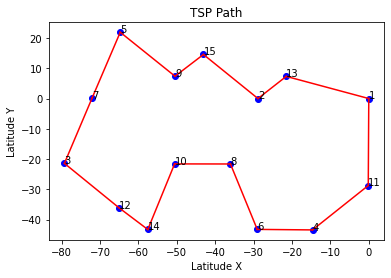

In [ ]:
import matplotlib.pyplot as plt
# plot the path on a map
fig, ax = plt.subplots()
for city in cities:
    ax.plot(city.latx, city.laty, 'bo')
    ax.text(city.latx, city.laty, city.name) 
for i in range(len(path)-1):
    ax.plot([path[i].latx, path[i+1].latx], [path[i].laty, path[i+1].laty], 'r')
ax.plot([path[-1].latx, path[0].latx], [path[-1].laty, path[0].laty], 'r')
ax.set_title('TSP Path')
ax.set_xlabel('Latitude X')
ax.set_ylabel('Latitude Y')
plt.show()